<a href="https://colab.research.google.com/github/Folkas/folkas/blob/gh-pages/South%20Korea%20Covid-19%20data%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project

## Background

We are glad you have successfully reached the capstone project part of "Data Science Fundamentals" course. You will put everything 
you have learned so far about data science to work. The outcome of this module should potentially serve as your portfolio item.

Unlike with previous projects, this time you are free to choose a dataset to explore from two suggested ones. As you will have to solve a provided problem using one or another dataset, there will not be list of predefined questions that you have to answer - be creative and explore any dimensions of data you deem worth analyzing.

Although this might seem scary, this is how data science looks like in the industry. Often, it's your responsibility to not only give answers using the data, but also raise questions. The more creatively you look at this project, the better. Good luck!

----

## Requirements

Whichever problem you choose to analyze, general requirements are as follow:

#### Exploratory Data Analysis
* Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data.
* Grouping the data and analyzing the groups - using Pandas aggregate methods.
* Work with features - handle missing data if needed, use pandas date APIs.
* Manipulate datasets - use joins in needed.
* Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.

#### Statistical hypothesis testing
* Use at least one statistical significance test.
* Report p-values.
* Use visualizations.

#### Modeling
* Visualize data with dimensionality reduction algorithms.
* Perform cluster analysis.
* Use a linear model to explain relationships by correlation and predict new values.

#### Presentation
* Present the project - the data, methods and results.

## Problems

#### COVID-19 crisis 

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1574515944794-d6dedc7150de?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1532&q=80" /></div>

The world is still struggling with one the most rapidly spreading pandemics. There are a lot of people who say that data is the best weapon we can use in this "Corona Fight". 

Imagine that you are one of the best data scientists in your country. The president of your country asked you to analyze the COVID-19 patient-level data of South Korea and prepare your homeland for the next wave of the pandemic. You, as the lead data scientist of your country **have to create and prove a plan of fighting the pandemics in your country** by analyzing the provided data. You must get most important insights using learned data science techniques and present them to the lead of your country.

## Evaluation Criteria

- Code quality
- Fulfillment of the idea
- Adherence to the requirements
- Delivery of the presentation

#### Statistical hypothesis testing
- Correct statistical test method is used, based on the situation.
- Reasoning on chosen statistical significance level.

#### Modeling
- Both PCA and T-SNE algorithms are used.

In [ ]:
#uploading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#uploading datasets

case = pd.read_csv("Case.csv") # Data of COVID-19 infection cases in South Korea
patients = pd.read_csv("PatientInfo.csv") # Epidemiological data of COVID-19 patients in South Korea
policy = pd.read_csv("Policy.csv") # Data of the government policy for COVID-19 in South Korea
region = pd.read_csv("Region.csv") # Location and statistical data of the regions in South Korea
search = pd.read_csv("SearchTrend.csv") #Trend data of the keywords searched in NAVER which is one of the largest portals in South Korea -
floating_pop = pd.read_csv("SeoulFloating.csv") #Data of floating population in Seoul, South Korea (from SK Telecom Big Data Hub) -
time_case = pd.read_csv("Time.csv", index_col='date', parse_dates=True) #Time series data of COVID-19 status in South Korea
time_age = pd.read_csv("TimeAge.csv", index_col='date', parse_dates=True) #Time series data of COVID-19 status in terms of the age in South Korea
time_gender = pd.read_csv("TimeGender.csv", index_col='date', parse_dates=True) #Time series data of COVID-19 status in terms of gender in South Korea
time_province = pd.read_csv("TimeProvince.csv", index_col='date', parse_dates=True) # Time series data of COVID-19 status in terms of the Province in South Korea
weather = pd.read_csv("Weather.csv") #Data of the weather in the regions of South Korea

##EDA


In [ ]:
time_case.isnull().any()

time         False
test         False
negative     False
confirmed    False
released     False
deceased     False
dtype: bool

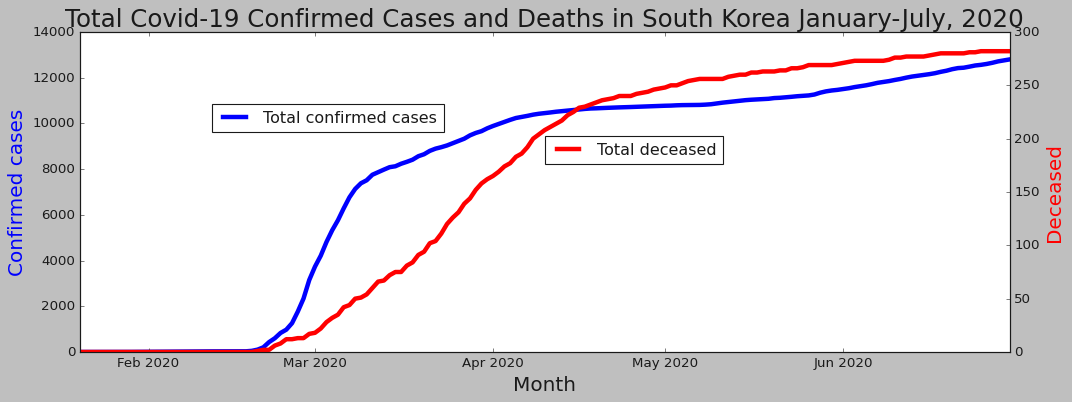

In [ ]:
#plotting Covid-19 statistics in South Korea
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(time_case.index, time_case["confirmed"], color="blue", linewidth=4.0, label="Total confirmed cases")
ax.set_xlabel("Month", fontsize=18)
ax.set_ylabel("Confirmed cases", fontsize=18, color="blue")
plt.legend(bbox_to_anchor=(0.4, 0.8))
ax2 = ax.twinx()
ax2.plot(time_case.index, time_case["deceased"], color="red", linewidth=4.0, label="Total deceased")
ax2.set_ylabel("Deceased", fontsize=18, color="red")
plt.legend(bbox_to_anchor=(0.7, 0.7))
ax.set_title("Total Covid-19 Confirmed Cases and Deaths in South Korea January-July, 2020", fontsize=22)
plt.show()

As we can see in the graph, the number of confirmed cases sharply increased in March, but soon leveled off and remained steady throughout the summer. Meanwhile, the number of deaths almost stopped growing in the mid April. While Western Europe and the US were heavily affected by the pandemic, South Korea managed to tackle the virus. Therefore, it is worth studying the measures taken by the country to stop the spread of pandemic.

In [ ]:
time_province.isnull().any()

time         False
province     False
confirmed    False
released     False
deceased     False
dtype: bool

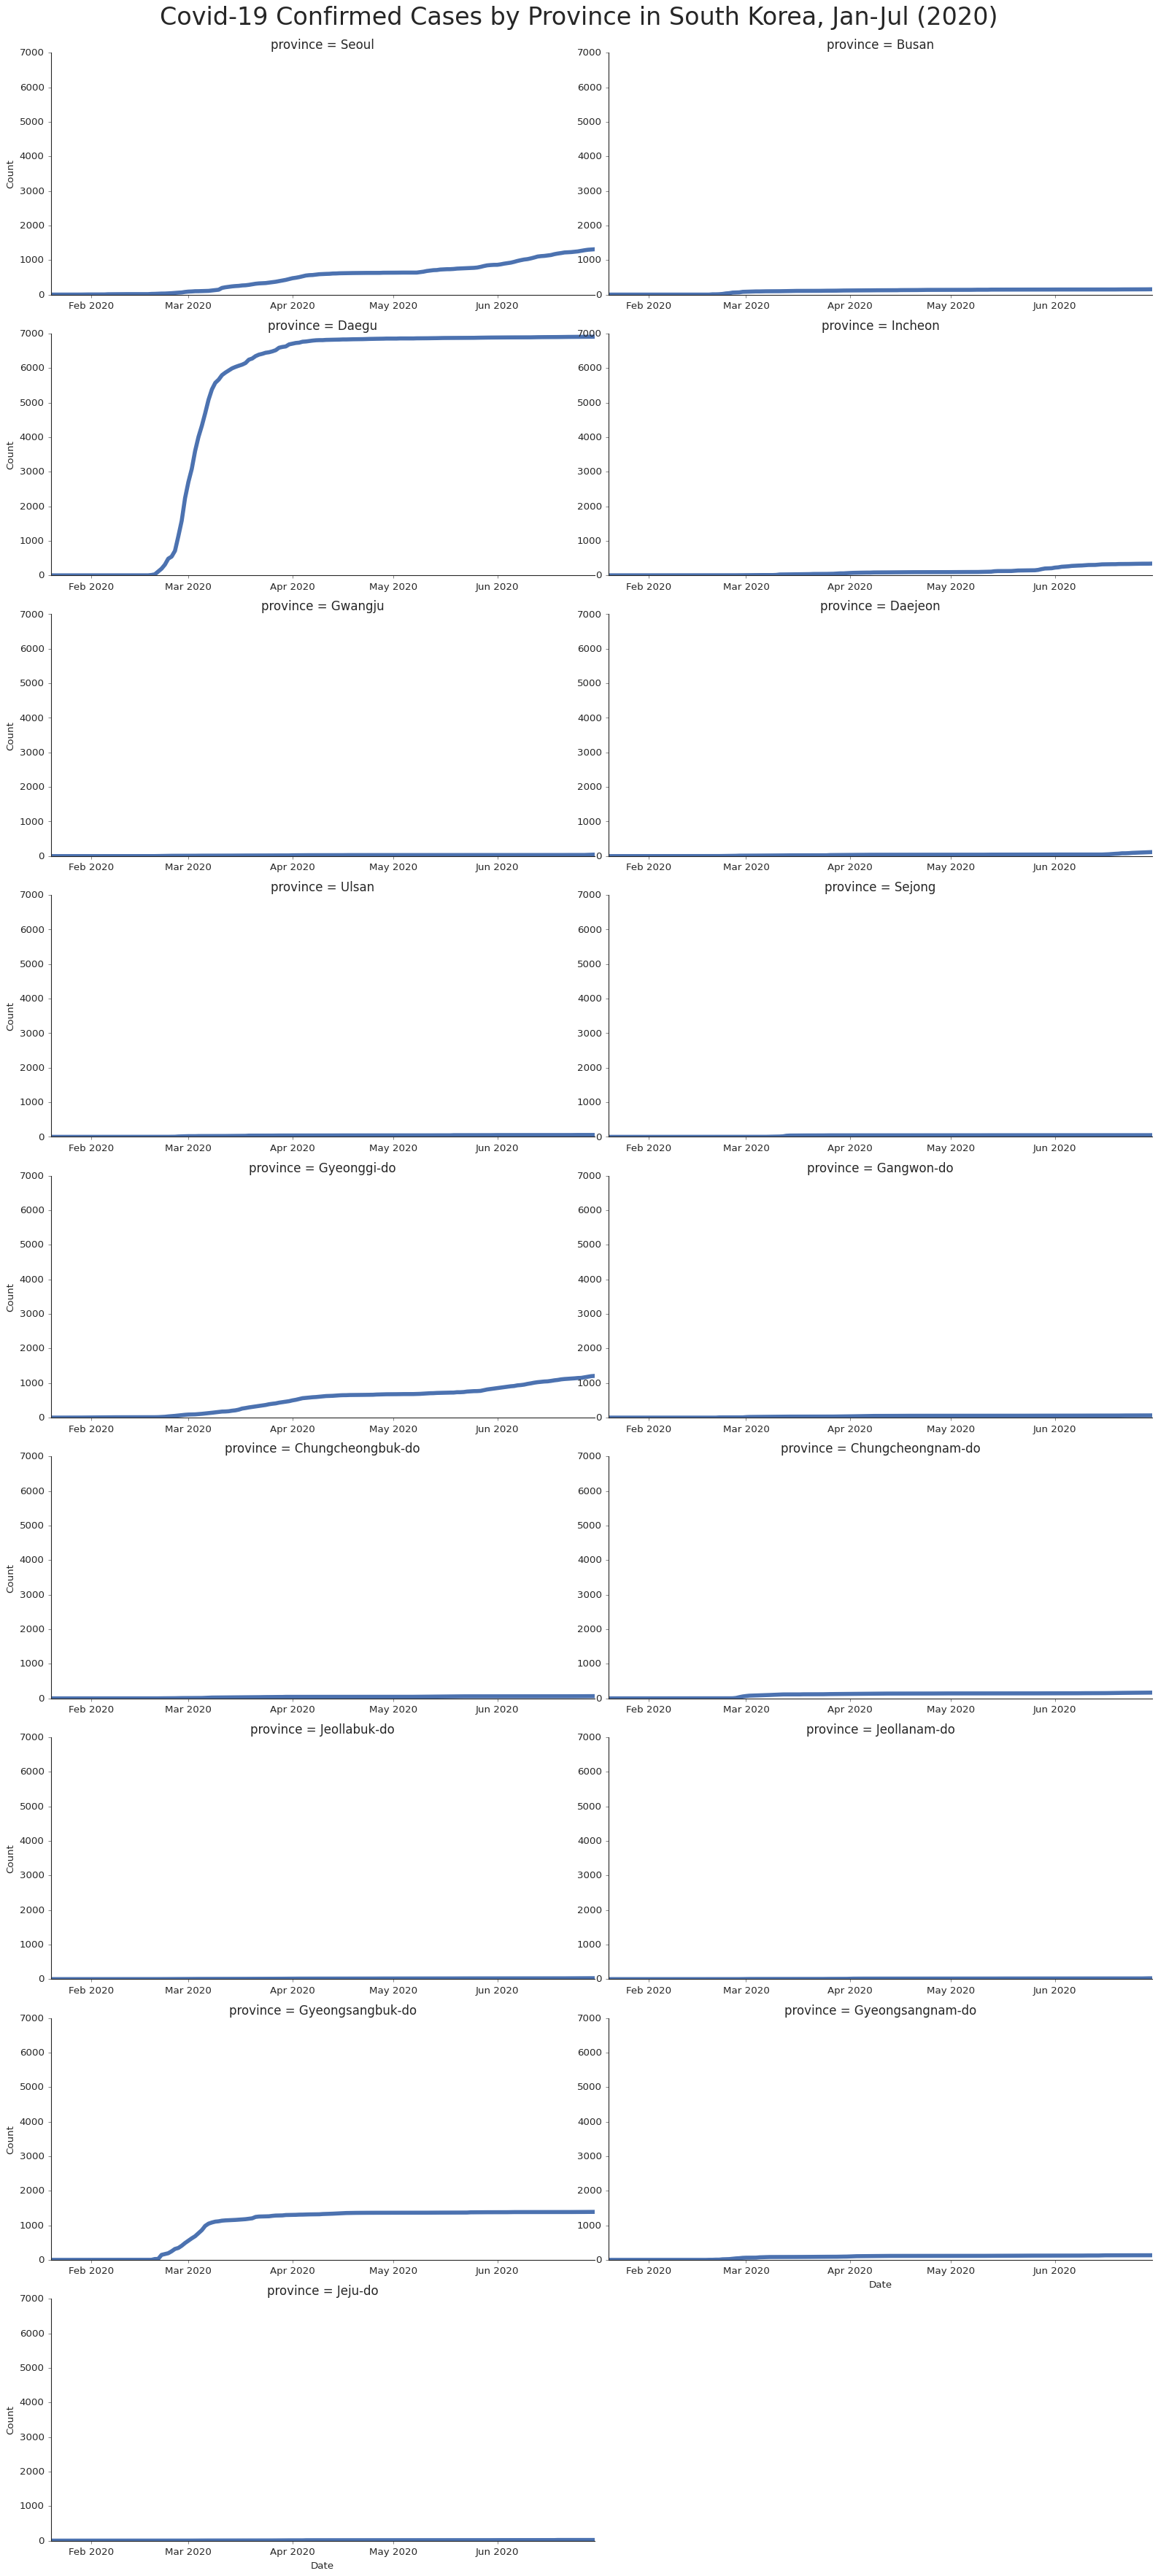

In [ ]:
sns.set_style("ticks")
g = sns.relplot(x=time_province.index, y=time_province.confirmed, col=time_province.province, col_wrap=2, aspect=2, kind="line", linewidth = 5)
g.set_titles(size=15).fig.tight_layout()
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True, labelleft=True)
plt.subplots_adjust(top=0.962)
g.fig.suptitle('Covid-19 Confirmed Cases by Province in South Korea, Jan-Jul (2020)', size=30)
g.set_axis_labels("Date", "Count")

The graphs above show how the spread of Covid-19 in January-June, 2020, by each province. What strikes most is that Seoul, a megapolis with 25 million people, reached just a bit more than 1,000 cases throughout the period. Other provinces had very low numbers, except for Daegu, the 3rd largest city in South Korea, where the cases broke out in March.

In [ ]:
time_age.isnull().any()

time         False
age          False
confirmed    False
deceased     False
dtype: bool

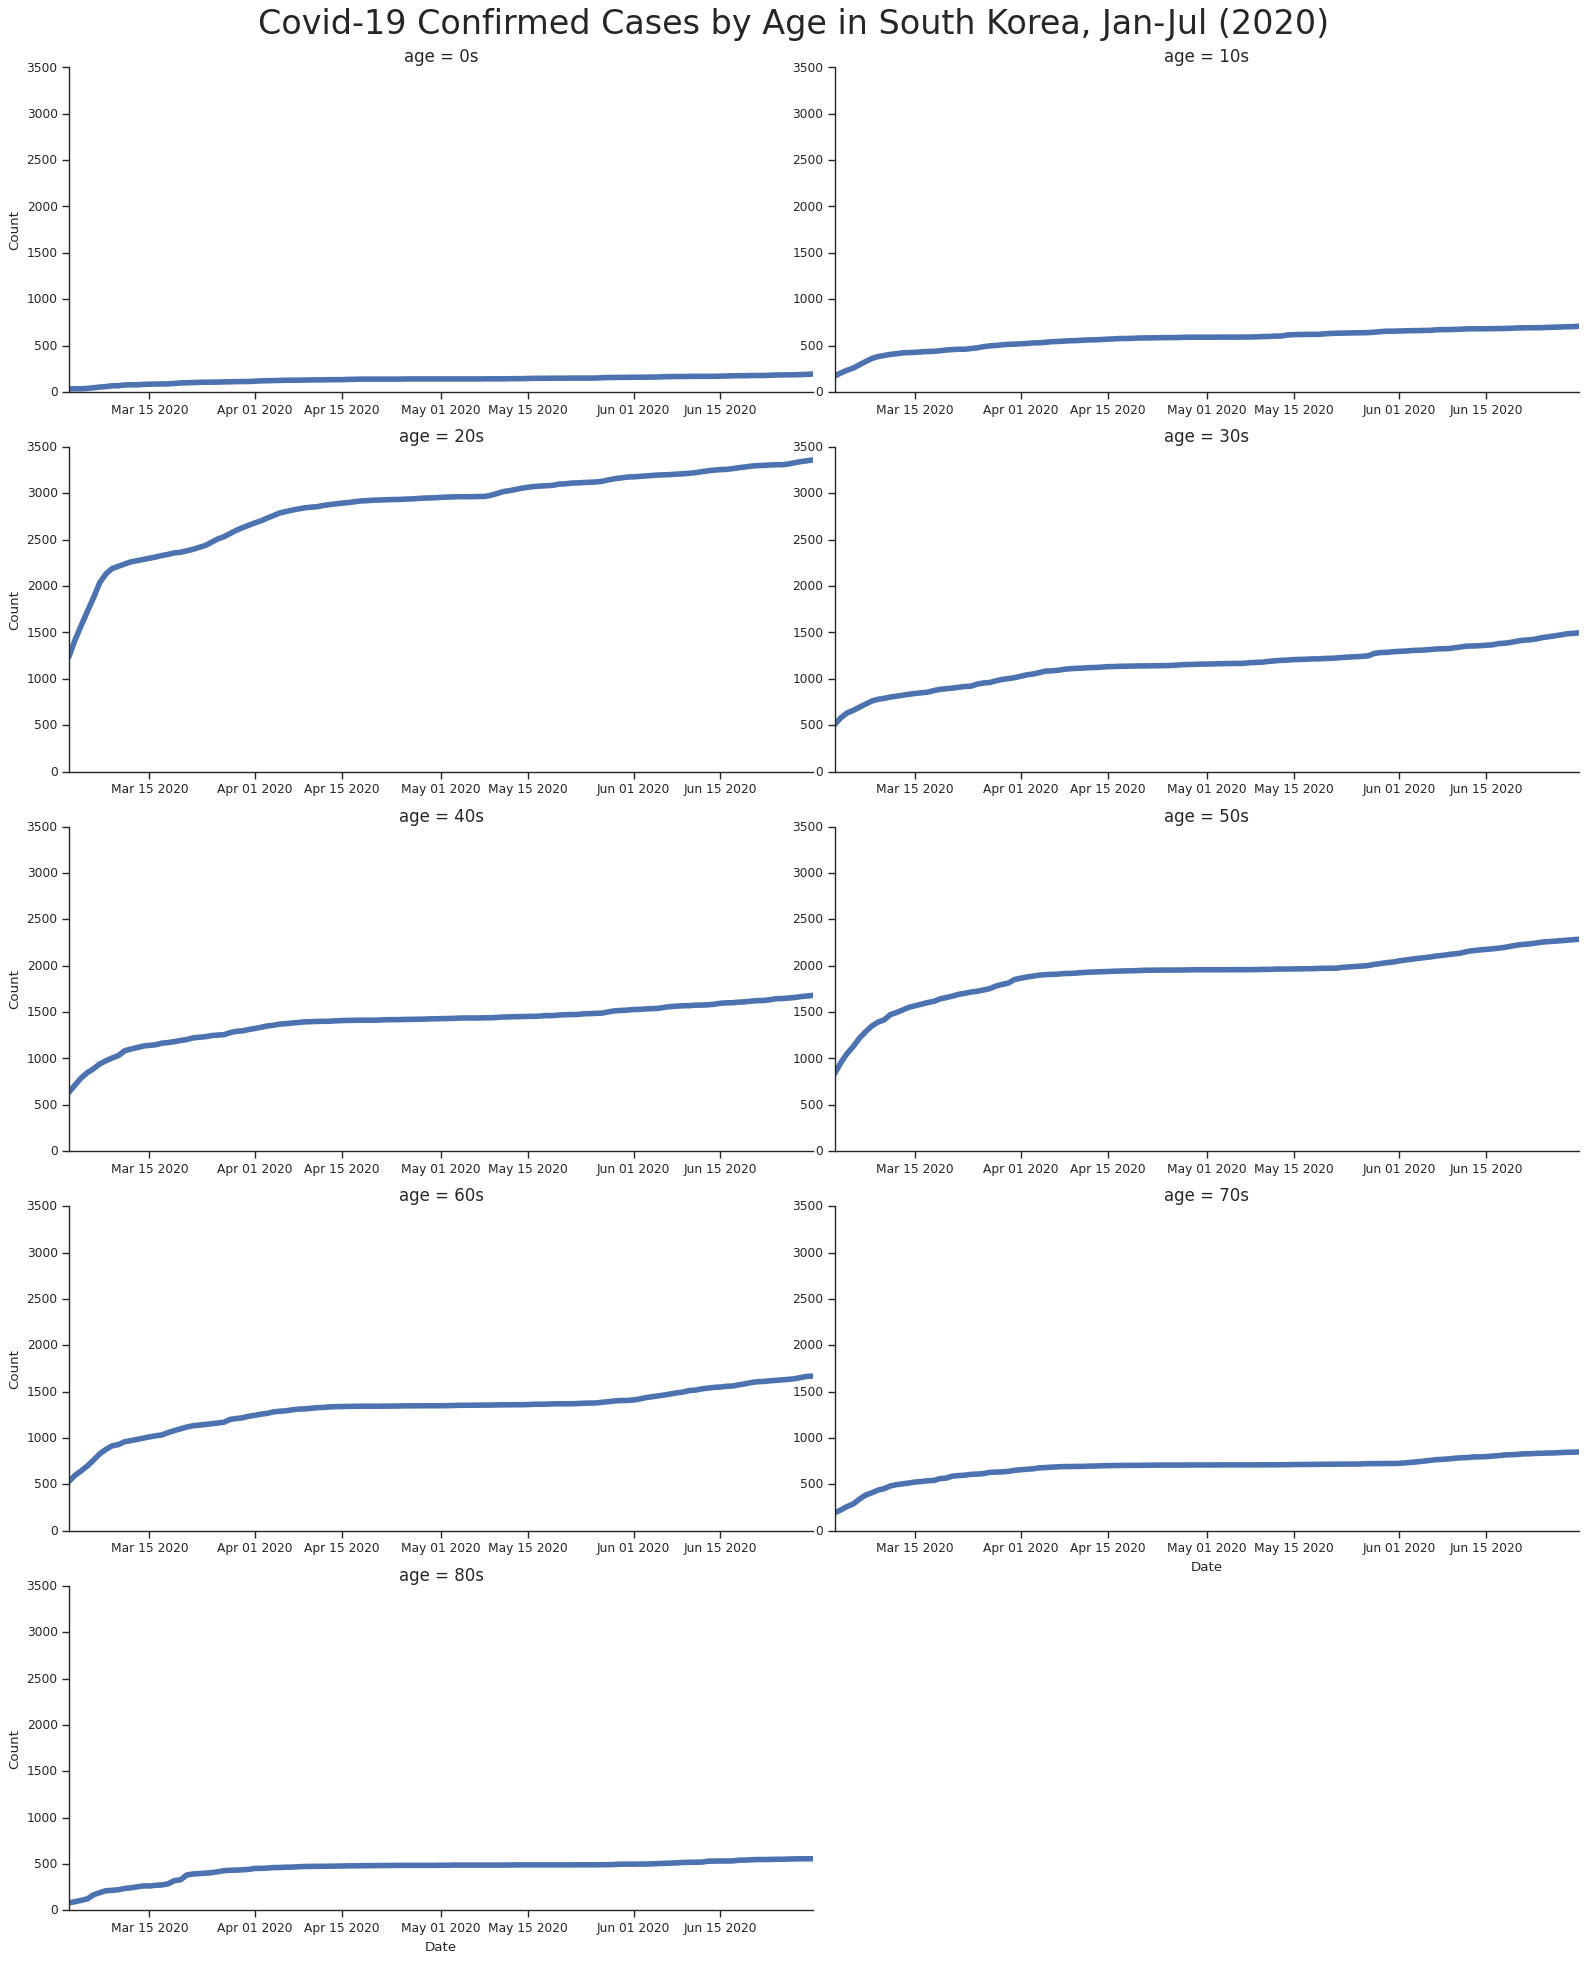

In [ ]:
sns.set(style="ticks")
h= sns.relplot(data=time_age, x=time_age.index, y="confirmed", col="age", lw=5, col_wrap=2, aspect=2, kind="line")
h.set_titles(size=15).fig.tight_layout()
for ax in h.axes.flatten():
    ax.tick_params(labelbottom=True, labelleft=True)
plt.subplots_adjust(top=0.95)
h.fig.suptitle('Covid-19 Confirmed Cases by Age in South Korea, Jan-Jul (2020)', size=30)
h.set_axis_labels("Date", "Count")

If we look at the Covid-19 case statistics from age perspective, we can see that people in 20s accounted for the vast part of confirmed cases. This follows a similar trend in the West, where the most cases were diagnosed also among young people. Older age groups saw lower figures, but as we will see later, accounted for most deaths among Koreans.

In [ ]:
#calculating new cases for each age group for every day
time_age["Dates"] = time_age.index
time_age.sort_values(["age", "Dates"])
time_age["new_cases"] = time_age.groupby("age")["confirmed"].diff().fillna(time_age.confirmed)

#grouping variables and using aggregate methods
round(time_age.groupby("age")["new_cases"].agg(["sum", "mean"]), 0)

,sum,mean
age,,
0s,193.0,2.0
10s,708.0,6.0
20s,3362.0,28.0
30s,1496.0,12.0
40s,1681.0,14.0
50s,2286.0,19.0
60s,1668.0,14.0
70s,850.0,7.0
80s,556.0,5.0


Again, the table above shows visualized statistics summarized in a table. As I mentioned before, people in 20s lead the statistics, followed by 50s age group.

In [ ]:
case.isnull().any()

 case_id          False
province          False
city              False
group             False
infection_case    False
confirmed         False
latitude          False
longitude         False
dtype: bool

In [ ]:
time_gender.isnull().any()

time         False
sex          False
confirmed    False
deceased     False
dtype: bool

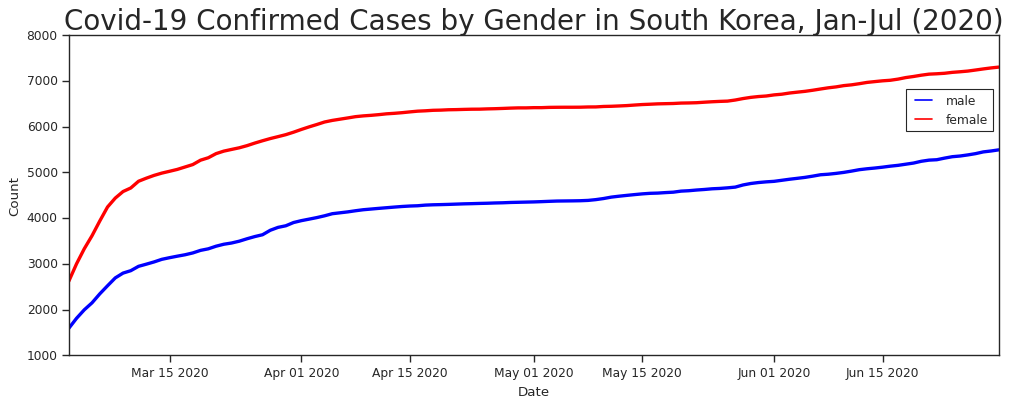

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
i = sns.lineplot(data=time_gender, x=time_gender.index, y="confirmed", hue="sex", lw=3, palette=("blue", "red"))
plt.ylabel("Count")
plt.xlabel("Date")
plt.title('Covid-19 Confirmed Cases by Gender in South Korea, Jan-Jul (2020)', size=25)
plt.legend(bbox_to_anchor=(1, 0.85))

If we look at the statistics from gender perspective, we can see that both male and female followed parallel trends. However, female with confirmed cases outnumbered male by almost 2,000.

##Government measures against Covid-19

In [ ]:
#analyzing government measures against the virus
policy.type.unique()

array(['Alert', 'Immigration', 'Health', 'Social', 'Education',
       'Technology', 'Administrative', 'Transformation'], dtype=object)

As we can see, the South Korean government took measures in various fields to combat the virus: immigration, social, education, administrative, etc. The plots below highlight when each measure was established. We can see, the means were effective, as the total number of confirmed cases and deaths slowed down starting from April!

<Figure size 1600x1600 with 0 Axes>

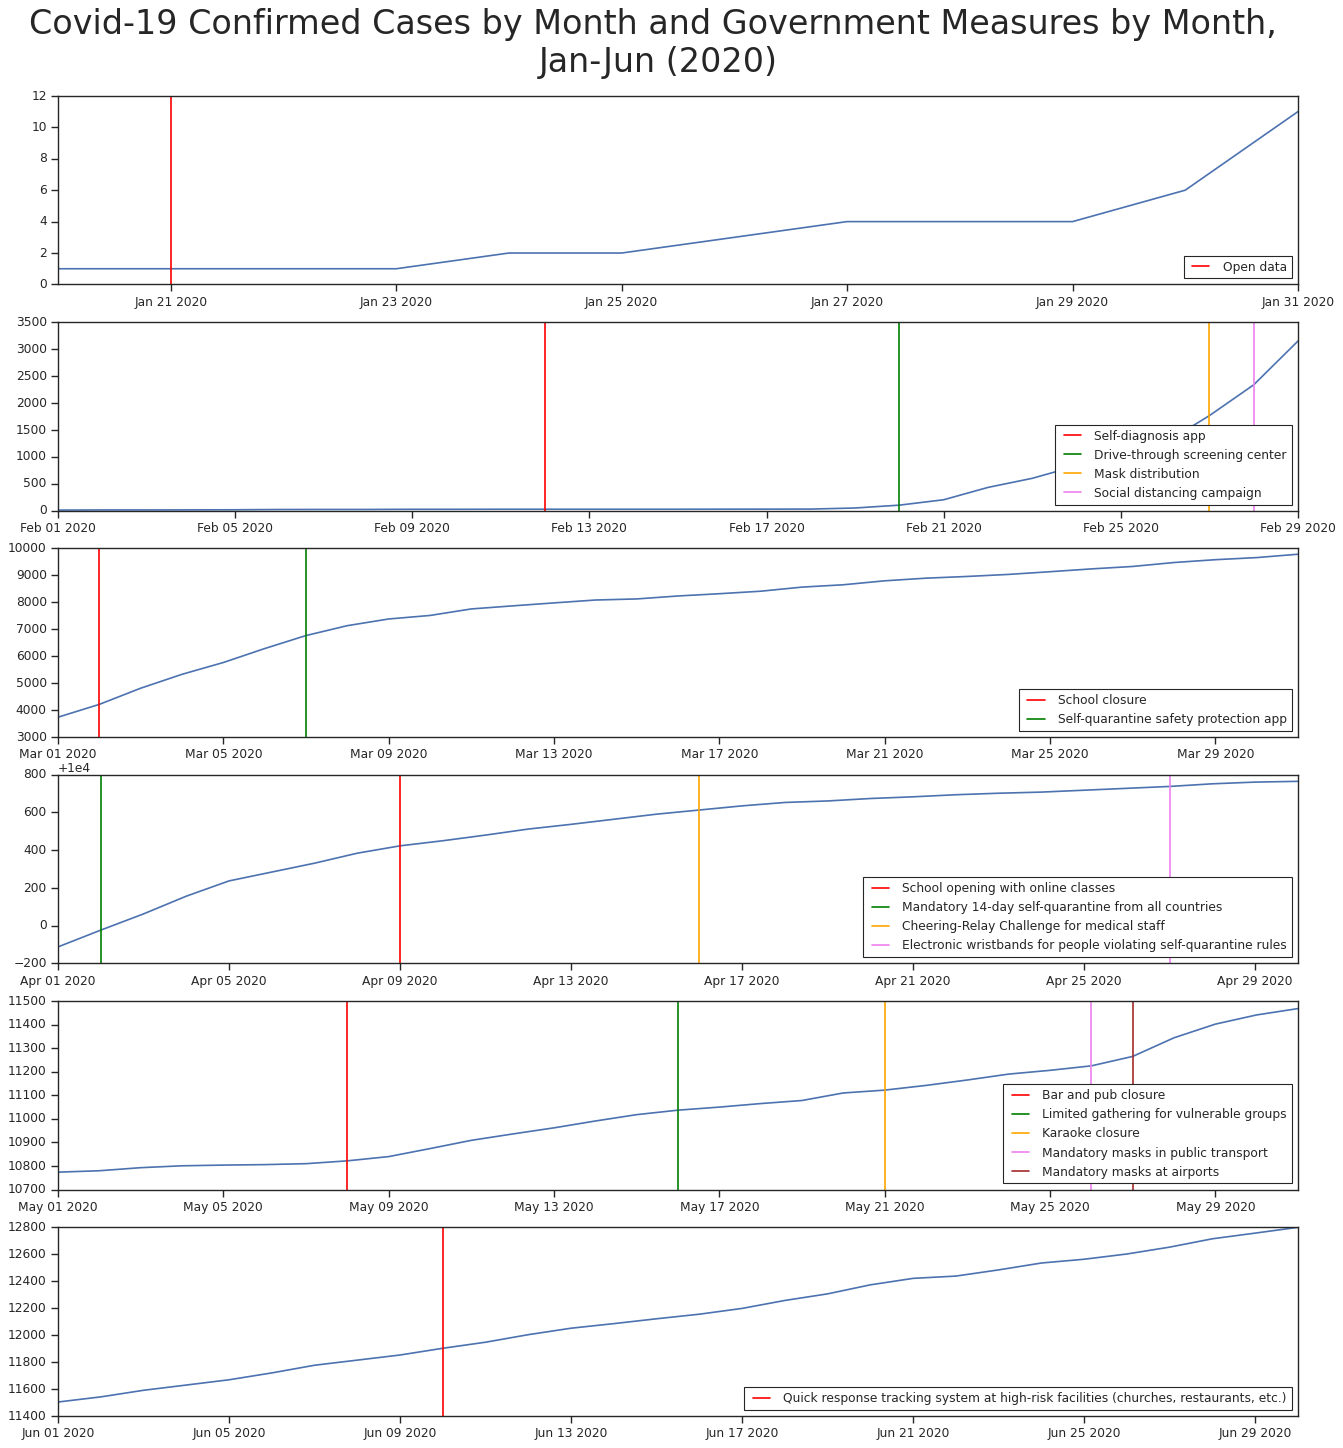

In [ ]:
#slicing dates into months
time_case["month"] = time_case.index.strftime("%B")

#visualizing government policies from policy dataset
plt.figure(figsize=(20,20))
fix, axs = plt.subplots(6, figsize=(20,20))
plt.subplots_adjust(top=0.925)
plt.suptitle('Covid-19 Confirmed Cases by Month and Government Measures by Month, \nJan-Jun (2020)', size=30)
axs[0].plot(time_case[time_case.month=="January"].index, time_case[time_case.month=="January"].confirmed)
axs[0].axvline(x=pd.to_datetime("2020-01-21"), label="Open data", color="red")
axs[0].legend(loc='lower right')
axs[1].plot(time_case[time_case.month=="February"].index, time_case[time_case.month=="February"].confirmed)
axs[1].axvline(x=pd.to_datetime("2020-02-12"), label="Self-diagnosis app", color="red")
axs[1].axvline(x=pd.to_datetime("2020-02-20"), label="Drive-through screening center", color="green")
axs[1].axvline(x=pd.to_datetime("2020-02-27"), label="Mask distribution", color="orange")
axs[1].axvline(x=pd.to_datetime("2020-02-28"), label="Social distancing campaign", color="violet")
axs[1].legend(loc='lower right')
axs[2].plot(time_case[time_case.month=="March"].index, time_case[time_case.month=="March"].confirmed)
axs[2].axvline(x=pd.to_datetime("2020-03-02"), label="School closure", color="red")
axs[2].axvline(x=pd.to_datetime("2020-03-07"), label="Self-quarantine safety protection app", color="green")
axs[2].legend(loc='lower right')
axs[3].plot(time_case[time_case.month=="April"].index, time_case[time_case.month=="April"].confirmed)
axs[3].axvline(x=pd.to_datetime("2020-04-09"), label="School opening with online classes", color="red") 
axs[3].axvline(x=pd.to_datetime("2020-04-02"), label="Mandatory 14-day self-quarantine from all countries", color="green")
axs[3].axvline(x=pd.to_datetime("2020-04-16"), label="Cheering-Relay Challenge for medical staff", color="orange")
axs[3].axvline(x=pd.to_datetime("2020-04-27"), label="Electronic wristbands for people violating self-quarantine rules", color="violet")
axs[3].legend(loc='lower right')
axs[4].plot(time_case[time_case.month=="May"].index, time_case[time_case.month=="May"].confirmed)
axs[4].axvline(x=pd.to_datetime("2020-05-08"), label="Bar and pub closure", color="red")
axs[4].axvline(x=pd.to_datetime("2020-05-16"), label="Limited gathering for vulnerable groups", color="green")
axs[4].axvline(x=pd.to_datetime("2020-05-21"), label="Karaoke closure", color="orange")
axs[4].axvline(x=pd.to_datetime("2020-05-26"), label="Mandatory masks in public transport", color="violet")
axs[4].axvline(x=pd.to_datetime("2020-05-27"), label="Mandatory masks at airports", color="brown")
axs[4].legend(loc='lower right')
axs[5].plot(time_case[time_case.month=="June"].index, time_case[time_case.month=="June"].confirmed)
axs[5].axvline(x=pd.to_datetime("2020-06-10"), label="Quick response tracking system at high-risk facilities (churches, restaurants, etc.)", color="red")
axs[5].legend(loc='lower right')

##Linear Regression


For linear regression task, I am going to look into how weather affected confirmed cases

In [ ]:
#preparing data for merging
weather.date = pd.to_datetime(weather.date)
time_province.reset_index(inplace=True)

In [ ]:
#merging datasets
df1 = (pd.merge(time_province, weather, on=["date", "province"], how="left") #using left joint to merge datasets
.drop(["code", "time"], axis=1) #dropping unnecessary columns
.dropna(axis=0)) #dropping rows with na values
df1.head()

,date,province,confirmed,released,deceased,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,2020-01-20,Seoul,0,0,0,0.7,-3.3,5.5,0.0,5.7,270.0,46.8
1,2020-01-20,Busan,0,0,0,5.1,1.6,9.8,0.0,6.1,270.0,45.6
2,2020-01-20,Daegu,0,0,0,4.6,2.4,8.1,0.0,6.4,290.0,44.1
3,2020-01-20,Incheon,1,0,0,1.2,-2.1,5.1,0.0,8.6,320.0,56.0
4,2020-01-20,Gwangju,0,0,0,4.0,1.2,7.9,0.0,3.3,270.0,63.1


In [ ]:
#calculating differences from cumulative distribution 
df1["new_cases"] = (df1.groupby("province")["confirmed"].diff().
                    fillna(df1.confirmed)) #filling NA values with confirmed cases
#adding a column avg_temp squared values
df1["avg_temp^2"] = df1.avg_temp**2
df1.head()

,date,province,confirmed,released,deceased,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,new_cases,avg_temp^2
0,2020-01-20,Seoul,0,0,0,0.7,-3.3,5.5,0.0,5.7,270.0,46.8,0.0,0.49
1,2020-01-20,Busan,0,0,0,5.1,1.6,9.8,0.0,6.1,270.0,45.6,0.0,26.01
2,2020-01-20,Daegu,0,0,0,4.6,2.4,8.1,0.0,6.4,290.0,44.1,0.0,21.16
3,2020-01-20,Incheon,1,0,0,1.2,-2.1,5.1,0.0,8.6,320.0,56.0,1.0,1.44
4,2020-01-20,Gwangju,0,0,0,4.0,1.2,7.9,0.0,3.3,270.0,63.1,0.0,16.00


Text(0.5, 1.0, 'Correlation Heatmap')

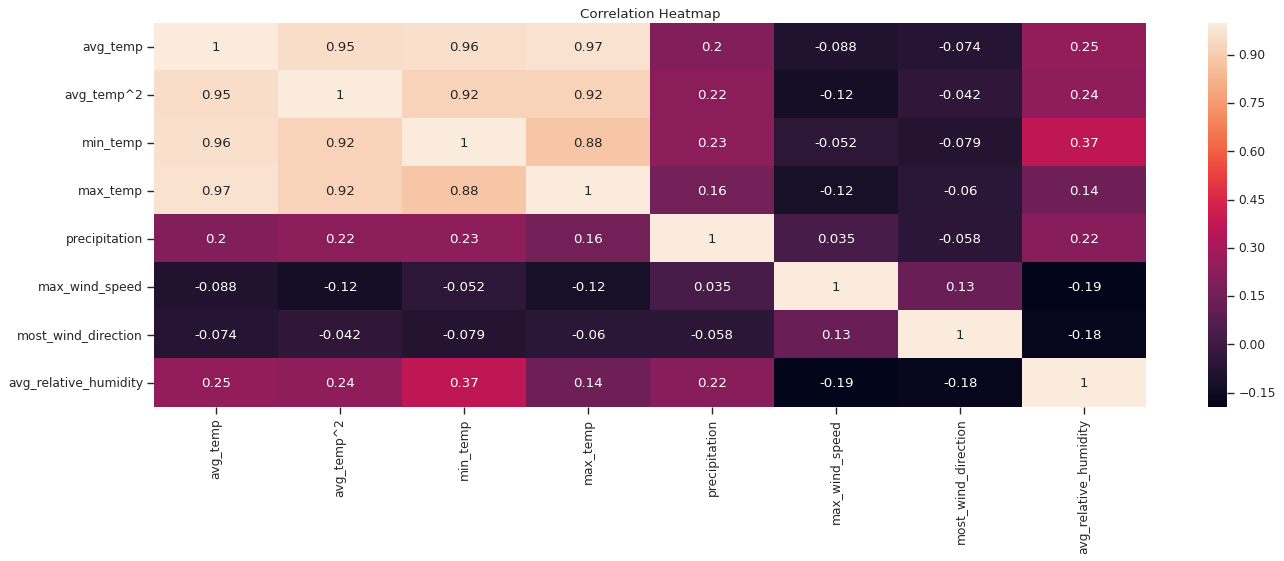

In [ ]:
#visualizing correlation among weather features using heatmap
features = ["avg_temp", "avg_temp^2", "min_temp", "max_temp", "precipitation", "max_wind_speed", "most_wind_direction", "avg_relative_humidity"]
plt.figure(figsize=(20, 6))
sns.heatmap(df1[features].corr(), annot=True).set_title('Correlation Heatmap')

Correlations among temperature variables are nearly 1, so I for further analysis I will choose only **avg_temp** variable.

In [ ]:
features = ["avg_temp", "precipitation", "max_wind_speed", "most_wind_direction", "avg_relative_humidity"]

#preparing for linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
df1[features].describe()

,avg_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
count,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000
mean,12.483997,0.984934,5.350664,197.630757,64.263349
std,7.233455,6.737884,2.087014,98.437855,16.530815
min,-8.300000,0.000000,1.400000,20.000000,17.900000
25%,7.000000,0.000000,4.000000,110.000000,50.900000
50%,11.500000,0.000000,4.900000,230.000000,64.550000
75%,18.700000,0.000000,6.200000,270.000000,77.000000
max,29.500000,99.200000,17.400000,360.000000,100.000000


The feature metrics are highly variated, so I'll need to normally standartize them before putting into linear regression.

In [ ]:
#converting features into normally standardized features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[features] = scaler.fit_transform(df1[features])

In [ ]:
#estimating linear regression

reg.fit(df1[features], df1.new_cases)
coeff_df = pd.DataFrame(reg.coef_, df1[features].columns, columns=['Coefficient'])
coeff_df

,Coefficient
avg_temp,-2.199921
precipitation,-0.310582
max_wind_speed,-0.021525
most_wind_direction,0.254972
avg_relative_humidity,1.175721


The beta coefficients are interpreted in terms of standard deviations, because the variables had been standardized.

In [ ]:
#selecting data for predictions
df1 = df1[(df1["date"] > "2020-02-20") & (df1["date"] < "2020-03-05")]

# #predicting confirmed cases by weather
df1["predicted_data"] = reg.predict(df1[features])
df1[["date", "province", "new_cases", "predicted_data"]]

,date,province,new_cases,predicted_data
544,2020-02-21,Seoul,5.0,6.637498
545,2020-02-21,Busan,0.0,4.728496
546,2020-02-21,Daegu,80.0,5.412154
547,2020-02-21,Incheon,0.0,7.245551
548,2020-02-21,Gwangju,2.0,6.044799
...,...,...,...,...
760,2020-03-04,Jeollabuk-do,0.0,7.464893
761,2020-03-04,Jeollanam-do,-1.0,5.844478
762,2020-03-04,Gyeongsangbuk-do,89.0,5.811419
763,2020-03-04,Gyeongsangnam-do,1.0,5.174533


In [ ]:
#evaluating regression model
from sklearn.metrics import mean_absolute_error

#mean absolute error (MAE)
mean_absolute_error(df1.new_cases, df1.predicted_data)


26.464496098354086

In [ ]:
#mean squared error (MSE)
from sklearn.metrics import mean_squared_error
mean_squared_error(df1.new_cases, df1.predicted_data)

8128.730249831263

In [ ]:
#R2 score
from sklearn.metrics import r2_score
r2_score(df1.new_cases, df1.predicted_data)

-0.04251909449053626

Accuracy metrics are not in favor of this model. Perhaps other measures than weather should be used to predict the confirmed cases.

##Modelling

In [ ]:
#analyzing sources of infection spread
case.infection_case.unique()

array(['Itaewon Clubs', 'Richway', 'Guro-gu Call Center',
       'Yangcheon Table Tennis Club', 'Day Care Center',
       'Manmin Central Church', 'SMR Newly Planted Churches Group',
       'Dongan Church', 'Coupang Logistics Center', 'Wangsung Church',
       "Eunpyeong St. Mary's Hospital", 'Seongdong-gu APT',
       'Jongno Community Center', 'Samsung Medical Center',
       'Jung-gu Fashion Company', 'Yeonana News Class',
       'Korea Campus Crusade of Christ', 'Gangnam Yeoksam-dong gathering',
       'Daejeon door-to-door sales',
       'Geumcheon-gu rice milling machine manufacture',
       'Shincheonji Church', 'Guri Collective Infection',
       'KB Life Insurance', 'Yeongdeungpo Learning Institute',
       'Gangnam Dongin Church', 'Biblical Language study meeting',
       'Seocho Family', 'Anyang Gunpo Pastors Group',
       'Samsung Fire & Marine Insurance', 'SJ Investment Call Center',
       'Yongin Brothers', 'Seoul City Hall Station safety worker',
       'Uiwang Logisti

The list shows quite a few sources of infection all over Korea. With some help of googling, I assigned each infection case to a certain category.

In [ ]:
#grouping infection cases into fewer categories
case["new"] = case.infection_case
case.new.loc[case.new.str.contains("Church", regex=False)] = "Church"
case.new.loc[case.new.str.contains("Biblical", regex=False)] = "Church"
case.new.loc[case.new.str.contains("Christ", regex=False)] = "Church"
case.new.loc[case.new.str.contains("Pastors", regex=False)] = "Church"
case.new.loc[case.new.str.contains("Temple", regex=False)] = "Church"
case.new.loc[case.new.str.contains("Tennis", regex=False)] = "Gym"
case.new.loc[case.new.str.contains("gym", regex=False)] = "Gym"
case.new.loc[case.new.str.contains("Clubs", regex=False)] = "Nightclub"
case.new.loc[case.new.str.contains("Hospital", regex=False)] = "Hospital"
case.new.loc[case.new.str.contains("Medical", regex=False)] = "Hospital"
case.new.loc[case.new.str.contains("Nursing", regex=False)] = "Nursing home"
case.new.loc[case.new.str.contains("Richway", regex=False)] = "Nursing home"
case.new.loc[case.new.str.contains("Milal", regex=False)] = "Nursing home"
case.new.loc[case.new.str.contains("Institute", regex=False)] = "Kingergarden/School/university"
case.new.loc[case.new.str.contains("Laboratory", regex=False)] = "Kingergarden/School/university"
case.new.loc[case.new.str.contains("Academy", regex=False)] = "Kingergarden/School/university"
case.new.loc[case.new.str.contains("Care", regex=False)] = "Kingergarden/School/university"
case.new.loc[case.new.str.contains("Class", regex=False)] = "Kingergarden/School/university"
case.new.loc[case.new.str.contains("Kindergarten", regex=False)] = "Kingergarden/School/university"
case.new.loc[case.new.str.contains("Soso", regex=False)] = "Kingergarden/School/university"
case.new.loc[case.new.str.contains("Call", regex=False)] = "Work"
case.new.loc[case.new.str.contains("Insurance", regex=False)] = "Work"
case.new.loc[case.new.str.contains("Logistics", regex=False)] = "Work"
case.new.loc[case.new.str.contains("logistics", regex=False)] = "Work"
case.new.loc[case.new.str.contains("Fashion", regex=False)] = "Work"
case.new.loc[case.new.str.contains("Ministry", regex=False)] = "Work"
case.new.loc[case.new.str.contains("manufacture", regex=False)] = "Work"
case.new.loc[case.new.str.contains("Orange", regex=False)] = "Work"
case.new.loc[case.new.str.contains("Wings", regex=False)] = "Work"
case.new.loc[case.new.str.contains("Town", regex=False)] = "Work"
case.new.loc[case.new.str.contains("overseas", regex=False)] = "Overseas"
case.new.loc[case.new.str.contains("Pilgrimage", regex=False)] = "Overseas"
case.new.loc[case.new.str.contains("door", regex=False)] = "Door-to-door sales" 
case.new.loc[case.new.str.contains("Daezayeon", regex=False)] = "Door-to-door sales"
case.new.loc[case.new.str.contains("Karaoke", regex=False)] = "Karaoke"
case.new.loc[case.new.str.contains("APT", regex=False)] = "Apartments"
case.new.loc[case.new.str.contains("Apartments", regex=False)] = "Apartments"
case.new.loc[case.new.str.contains("myeon", regex=False)] = "Apartments"
case.new.loc[case.new.str.contains("etc", regex=False)] = "Other case"
case.new.loc[case.new.str.contains("Community", regex=False)] = "Community/cultural center"
case.new.loc[case.new.str.contains("culture", regex=False)] = "Community/cultural center"
case.new.loc[case.new.str.contains("contact", regex=False)] = "Contact with patient"
case.new.loc[case.new.str.contains("safety", regex=False)] = "Contact with patient"
case.new.loc[case.new.str.contains("gathering", regex=False)] = "Contact with patient"
case.new.loc[case.new.str.contains("Collective", regex=False)] = "Contact with patient"
case.new.loc[case.new.str.contains("Yechun-gun", regex=False)] = "Contact with patient"
case.new.loc[case.new.str.contains("Yongin", regex=False)] = "Restaurant"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#grouping by infection cases
case.groupby("new")["confirmed"].agg(sum).sort_values(ascending=False)

new
Church                            5581
Contact with patient              1467
Other case                        1192
Overseas                           990
Hospital                           692
Work                               436
Nursing home                       354
Nightclub                          271
Gym                                182
Kingergarden/School/university      77
Door-to-door sales                  72
Apartments                          36
Community/cultural center           29
Karaoke                              7
Seocho Family                        5
Restaurant                           4
Name: confirmed, dtype: int64

As the table shows, most cases arose from churches, contacts with patients and other cases.

In [ ]:
#reshaping grouped variables by provinces
df3 = pd.pivot_table(case, values="confirmed", index=["province", "city"], columns="new", aggfunc=np.sum).fillna(0)
names = df3.columns
df3 = df3.reset_index()
names_prov = df3.columns
df3.head()

new,province,city,Apartments,Church,Community/cultural center,Contact with patient,Door-to-door sales,Gym,Hospital,Karaoke,Kingergarden/School/university,Nightclub,Nursing home,Other case,Overseas,Restaurant,Seocho Family,Work
0,Busan,-,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,36.0,0.0,0.0,0.0
1,Busan,Dongnae-gu,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Busan,Haeundae-gu,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Busan,Jin-gu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Busan,Suyeong-gu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#standardizing case features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df4 = pd.DataFrame(scaler.fit_transform(df3[names]), columns=[names])
df4.head()

new,Apartments,Church,Community/cultural center,Contact with patient,Door-to-door sales,Gym,Hospital,Karaoke,Kingergarden/School/university,Nightclub,Nursing home,Other case,Overseas,Restaurant,Seocho Family,Work
0,-0.211239,-0.136768,-0.170033,0.010692,-0.14325,-0.176944,-0.223593,-0.111111,-0.192329,-0.189939,-0.241067,0.184263,0.506569,-0.111111,-0.111111,-0.329645
1,-0.211239,-0.058398,-0.170033,-0.172357,-0.14325,-0.176944,-0.223593,-0.111111,-0.192329,-0.189939,-0.241067,-0.173219,-0.255608,-0.111111,-0.111111,-0.329645
2,-0.211239,-0.124711,-0.170033,-0.172357,-0.14325,-0.176944,-0.223593,-0.111111,-0.192329,-0.189939,-0.241067,-0.173219,-0.255608,-0.111111,-0.111111,-0.329645
3,-0.211239,-0.136768,-0.170033,-0.172357,-0.14325,-0.176944,-0.223593,-0.111111,0.626942,-0.189939,-0.241067,-0.173219,-0.255608,-0.111111,-0.111111,-0.329645
4,-0.211239,-0.136768,-0.170033,-0.172357,-0.14325,-0.176944,-0.223593,-0.111111,0.831760,-0.189939,-0.241067,-0.173219,-0.255608,-0.111111,-0.111111,-0.329645


###PCA

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#using PCA algorithm to perform dimensionality reduction to 2 for data visualization
pca = PCA(n_components=2)
case_pca = pca.fit_transform(df4)
case_pca.shape #same n of rows as in feats


NameError: ignored

In [ ]:
pca.explained_variance_ratio_

array([0.13350215, 0.09088987])

By reducing dimensions to **2 components** (in order to visualize the data), I preserve just  **22%** of previous variance, whereas the benchmark is **95%**.

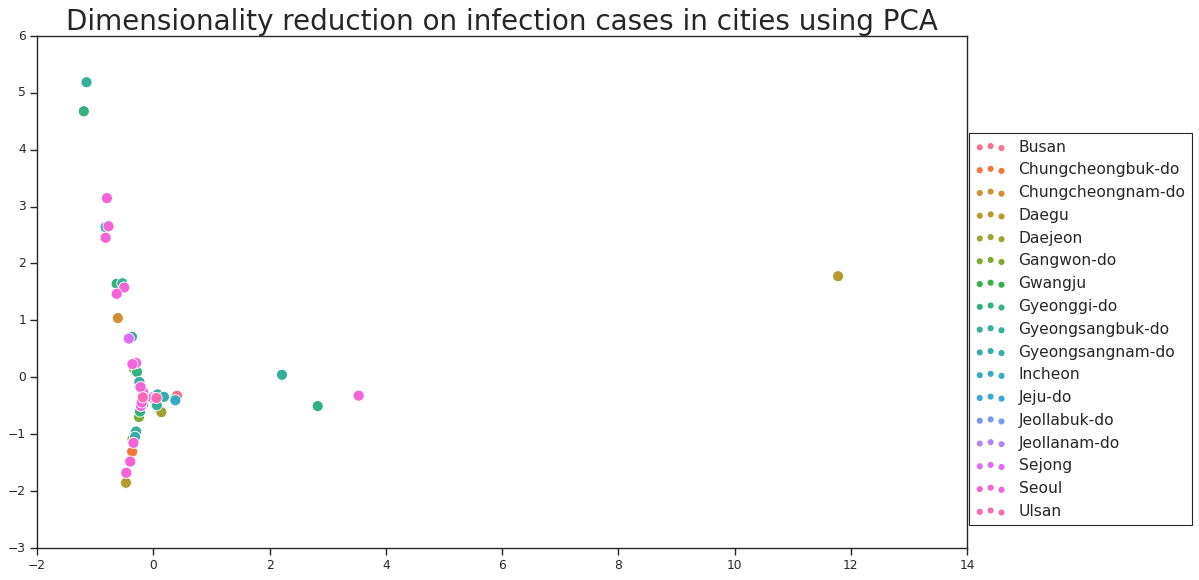

In [ ]:
#visualizing dimensionality reduction 
plt.figure(figsize=(15,8))

#verifying datas separability by weather
sns.scatterplot(x=case_pca[:, 0], y=case_pca[:, 1], hue=df3.province, s=100).set_title("Dimensionality reduction on infection cases in cities using PCA", size=25)
plt.legend(bbox_to_anchor=(1.25, 0.825), fontsize=14)

###t-SNE

In [ ]:
#performing dimensionality reduction using t-SNE method
from sklearn.manifold import TSNE
case_tsne = TSNE(n_components=2).fit_transform(df4)

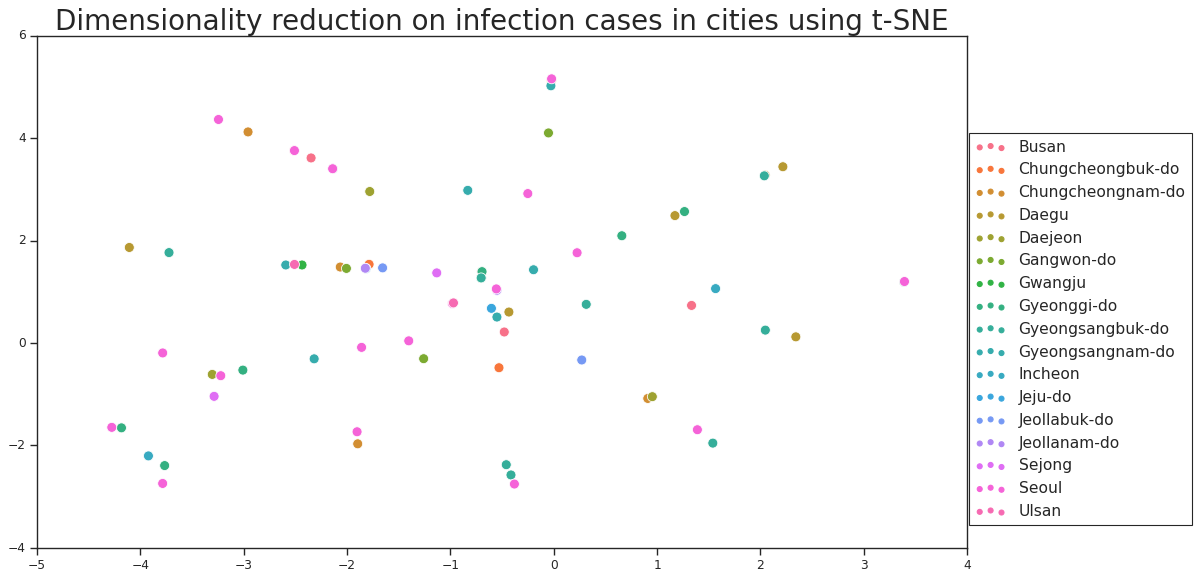

In [ ]:
#visualizing dimensionality reduction 
plt.figure(figsize=(15,8))

#verifying datas separability by weather
sns.scatterplot(x=case_tsne[:, 0], y=case_tsne[:, 1], hue=df3.province, s=80).set_title("Dimensionality reduction on infection cases in cities using t-SNE", size=25)
plt.legend(bbox_to_anchor=(1.25, 0.825), fontsize=14)

###KMeans

In [ ]:
from sklearn.cluster import KMeans
#Elbow method to select the right n of clusters
#selecting n of clusters
distortions = []
K = range(1,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(case_pca)
    distortions.append(kmeanModel.inertia_)

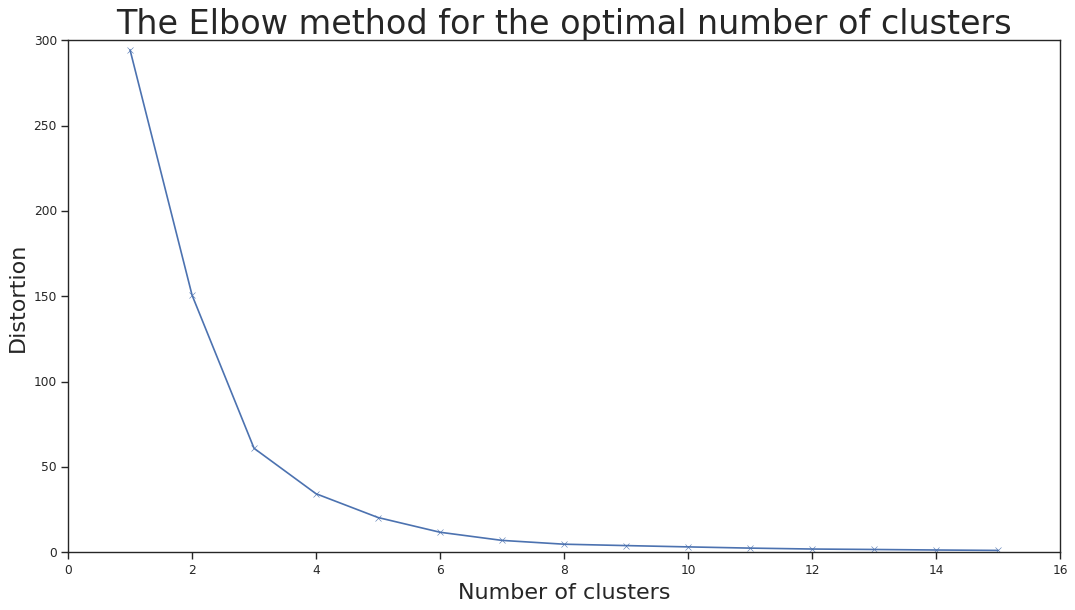

In [ ]:
#plotting the distortions of K-means for Elbow method
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters', size=20)
plt.ylabel('Distortion', size=20)
plt.title('The Elbow method for the optimal number of clusters', size=30)
plt.show()

The graph above shows how the distortion changes as we increase the number of clusters. The distortion, or inertia, drops sharply until x=3. The optimal number of clusters to run a K-means algorithm is from 4 to 6. I will pick n=6.

In [ ]:
#running KMeans algorithm for 6 clusters
clusterer = KMeans(n_clusters=6)
clusterer.fit(case_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#cluster_centers_ method provides the coordinates of each centroid
centroids = clusterer.cluster_centers_
centroids

array([[-0.36561229, -1.27039927],
       [11.78030387,  1.77551596],
       [-1.17338384,  4.92997412],
       [-0.1443231 , -0.28795285],
       [-0.68033132,  2.03003291],
       [ 2.85732847, -0.26281845]])

In [ ]:
#using predict method to assign each province to a cluster
y_kmeans = clusterer.predict(case_pca)
y_kmeans

array([3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 4, 3, 3, 1, 0, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 5, 3, 4, 3, 3, 3, 2, 5, 4, 0, 3, 3, 2, 3, 3, 3,
       0, 3, 0, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 0, 3, 3,
       3, 3, 3, 4, 4, 4, 3, 0, 3, 0, 3, 3, 4, 4, 3, 3], dtype=int32)

Text(0.5, 1.0, 'Cluster analysis using Kmeans algorithm (n=6)')

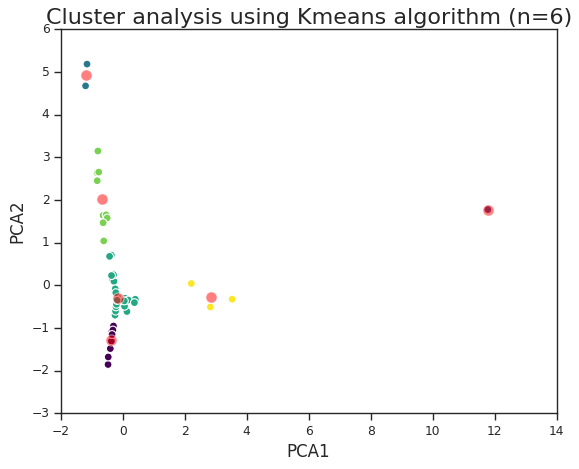

In [ ]:
#plotting clusters
plt.scatter(case_pca[:, 0], case_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
#plotting centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.5)
plt.xlabel('PCA1', size=15)
plt.ylabel('PCA2', size=15)
plt.title('Cluster analysis using Kmeans algorithm (n=6)', size=20)

##Statistical hypothesis testing

I test the hypothesis that patients older than age 70 are significantly more likely to die if diagnozed with Covid-19, compared with the younger groups. For statistical test, I will use 95% significance level, which is widely accepted in public health research, according to [Powell (Na)](https://www.in.gov/isdh/24207.htm)

**H0:**there's no difference in death rate between patients aged 70+ and younger ones (<70+)

**H1:** patients aged 70+ and diagnozed with Covid-19 have higher death rate than younger patients

Since both samples are greater than 30 in size, I can use z-test to compare proportions between two independent samples.
Formula for z-test:
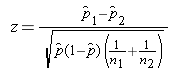

* Use at least one statistical significance test.


In [ ]:
df5 = time_age.loc[time_age.Dates=="2020-06-30"]
df5.head()

,time,age,confirmed,deceased,Dates,new_cases
date,,,,,,
2020-06-30,0,0s,193,0,2020-06-30,3.0
2020-06-30,0,10s,708,0,2020-06-30,4.0
2020-06-30,0,20s,3362,0,2020-06-30,10.0
2020-06-30,0,30s,1496,2,2020-06-30,6.0
2020-06-30,0,40s,1681,3,2020-06-30,8.0


In [ ]:
#calculating variables for hypothesis testing

old_count = df5.loc[(df5.age=="70s")|(df5.age=="80s")][["confirmed", "deceased"]].sum().sum()
young_count = df5.loc[~((df5.age=="70s")|(df5.age=="80s"))][["confirmed", "deceased"]].sum().sum()
old_death = df5.loc[(df5.age=="70s")|(df5.age=="80s")][["deceased"]].sum().values
young_death = df5.loc[~((df5.age=="70s")|(df5.age=="80s"))][["deceased"]].sum().values

In [ ]:
#calculating z-score

from statsmodels.stats.proportion import proportions_ztest
successes = np.array([221, 61])
samples = np.array([1627, 11455])
stat, pval = proportions_ztest(nobs=samples, count=successes, alternative="larger")
stat #z-value

33.91835477224413

From statistical test I derived z-score=33.918. 

In [ ]:
#critical value for 95% significance level
from scipy.stats import norm
norm.ppf(0.95)

1.6448536269514722

Z-score (33.918) is absolutely higher than the critical value (1.64). Therefore, I conclude that the null hypothesis is rejected. Persons aged 70+ with Covid-19 are significantly more likely to die from the coronavirus than younger people.

* Report p-values.


In [ ]:
print('{0:0.4f}'.format(pval))

0.0000


P-value is lower than 0.001, which means that the results are robust even at $\alpha$=0.001

* Use visualizations.

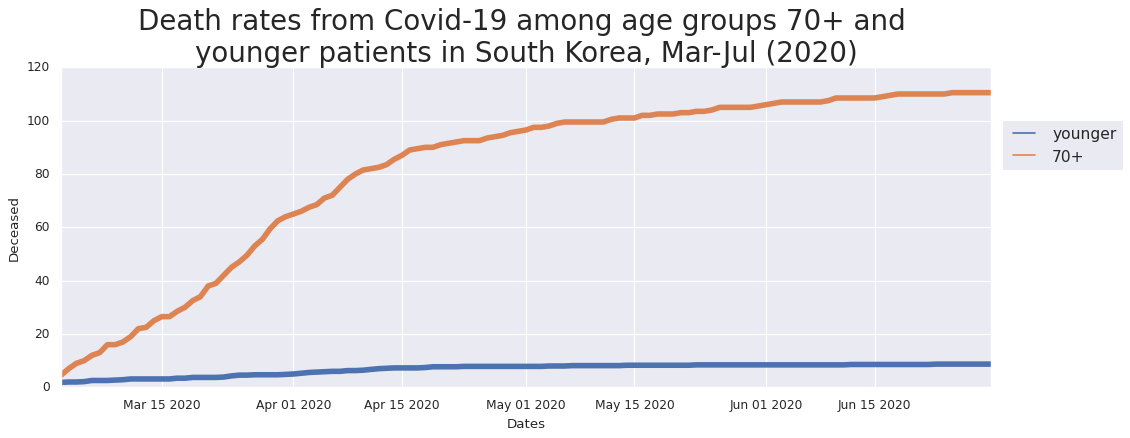

In [ ]:
#creating a separate column to categorize age groups
def age_group(x):
  if (x == "70s") | (x == "80s"):
    newx = "70+"
  else:
    newx = "younger"
  return (newx)
time_age["age_group"] = time_age.age.apply(age_group)
time_age

#visualizing death rates for statistical testing

plt.figure(figsize=(15, 5))
sns.set()
d = sns.lineplot(x=time_age.Dates, y=time_age.deceased, hue=time_age.age_group, ci=None, lw=5)
d.set_title("Death rates from Covid-19 among age groups 70+ and \nyounger patients in South Korea, Mar-Jul (2020)", size=25)
d.set_ylabel("Deceased")
plt.legend(bbox_to_anchor=(1.15, 0.86), fontsize=14)

The graph above again proves what was tested before: people in their 70s and older are significantly more likely to die from the virus, compared to younger groups. In the meantime, senior people accounted only for a small share of confirmed cases, as we saw before. It means that the virus is much more dangerous for seniors!